# PHYS280: HW 4

Kavish Senthilkumar


Credit: Sagar, Aditya, Jasleen


Dedicated to: My loving family. Thank you for everything.

## 1. Data lumping
### a. 

From the textbook, we use the convolution formula. We rearrange to $x_1+x_2=2y$. 

Using this formula,

$$P_{2y}(2y) = \int_{-\infty}^\infty P_{x_1}(x_1) P_{x_2}(2y-x_1) dx_1 $$.

Assuming $y$ is from a random variable $Y$, we see the PDF of Y is $P(Y=y)$. When we have $2Y$, as above, we get $P(2Y=y) \implies P(Y=\frac{y}{2})$. Thus, $\int P(Y=\frac{y}{2}) = \frac{1}{2} \int P(Y=y) = \frac{1}{2}$, because we only cover half the values of y. 

To get the PDF of $y$, we must multiply by 2, so $\int 2 P(Y=\frac{y}{2}) = \int P(Y=y) = 1$.

We then have $$P_{y}(y) = 2\int_{-\infty}^\infty P_{x_1}(x_1) P_{x_2}(2y-x_1) dx_1 $$.


### b. 

They have a unimodal distribution. Any of the 10 samples have a chance of coming from the right bump or the left bump (most likely is the pair comes from the peak of the left bump and the peak of the right bump), and so the means of all groups of 10 samples will tend towards the mean of the left and right bumps. In essence, taking the averages of 10 randomly chosen values will cause the bumps in the bimodal distribution to "balance out," creating one bump that is centered around the average of the two bumps.  Depending on the initial bimodal distribution and the sample size, we can also see the average tend to a Gaussian distribution centered at the average by the Central Limit Theorem. We note however that we only conclude strong convergence to the mean when averaging a large amount of different random variables, instead of just the values drawn from two sides of a bimodal distribution. 

## 2. Central Limit
### a. 

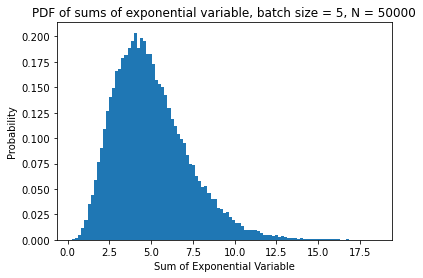

In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng

plt.figure(0)
#We start with batches of 5 and N=50000
N=50000
batches = 5

#We want to sample rands = e^-(draws), where y is our randomly generated number.
#So, we set draws = -ln (rands). 
rands =rng((N, batches))
draws =-np.log(rands)

#sum up draws and plot with 100 bins
data = np.sum(draws, axis=1)
bins = np.linspace(min(data), max(data), 100)
plt.hist(data, bins=bins, density = True)

plt.title("PDF of sums of exponential variable, batch size = 5, N = 50000")
plt.xlabel("Sum of Exponential Variable")
plt.ylabel("Probability")
plt.show()

### b. 

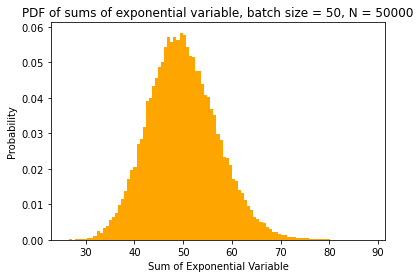

In [37]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng

#We start with batches of 50 and N=50000
plt.figure(1)
N= 50000
batches = 50

#We want to sample rands = e^-(draws), where y is our randomly generated number.
#So, we set draws = -ln (rands). 
rands =rng((N, batches))
draws =-np.log(rands).astype('float')

#sum up draws and plot with 100 bins
data = np.sum(draws, axis=1)

bins = np.linspace(min(data), max(data), 100)

plt.hist(data, bins=bins, density = True, color="orange")
plt.title("PDF of sums of exponential variable, batch size = 50, N = 50000")
plt.xlabel("Sum of Exponential Variable")
plt.ylabel("Probability")
plt.show()

We see that as we increase batch size, the distribution becomes more Gaussian. It appears exponential at batch size 5 but Gaussian at batch size 50 because of the Central Limit Theorem. Specifically, the sum of many random variables tends towards the mean of these random variables. As we increase the number of random variables we sum up (in this case, the batch size), the distribution will tend more and more towards the mean. This appears as a Gaussian distribution centered at the mean.

## 3. Unmixing
### a. 

$$P(0|x) = \frac{P(0 \cap x)}{P(x)} = \frac{\epsilon F_0(x)}{P(x)}$$
$$P(1|x) = \frac{P(1 \cap x)}{P(x)} = \frac{(1-\epsilon) F_1(x)}{P(x)}$$

Since $x$ can be in either population, $P(x) = \epsilon F_0(x) + (1-\epsilon) F_1(x)$. Thus, 

$$\boxed{P(0|x)  = \frac{\epsilon F_0(x)}{\epsilon F_0(x) + (1-\epsilon) F_1(x)}}$$
$$\boxed{P(1|x)  = \frac{(1-\epsilon) F_1(x)}{\epsilon F_0(x) + (1-\epsilon) F_1(x)}}$$

### b. 

$F_0(x)$ and $F_1(x)$ return unitless probabilities regardless of the units of $x$. We divide by $P(x)$, which also returns a unitless probability regardless of the units of $x$. $\epsilon$ is also unitless.  Thus, our final answer is unitless. We note that $P(0 \cap x)$ and $P(1 \cap x)$ do not cause unit problems, because $x$ has certain units, and $x$ can be in either subpopulation $0$ or $1$, all of whose members use the same units. 


When $F_0=F_1$, 

$$P(0|x)  = \frac{\epsilon F_0(x)}{\epsilon F_0(x) + (1-\epsilon) F_0(x)} = \frac{\epsilon F_0(x)}{F_0(x)}=\boxed{\epsilon}$$
$$P(1|x)  = \frac{(1-\epsilon) F_0(x)}{\epsilon F_0(x) + (1-\epsilon) F_0(x)} = \frac{(1-\epsilon) F_0(x)}{ F_0(x)} = \boxed{1-\epsilon}$$

These formulas make sense because when $F_0=F_1$, the probability distributions of each subpopulation are equal, so the chance reduces to the probability of choosing from the subpopulation. 

### c. and d.  

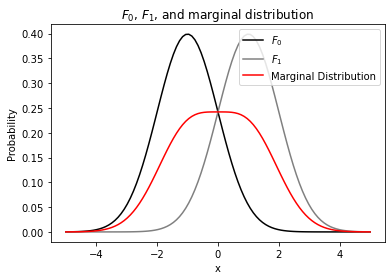

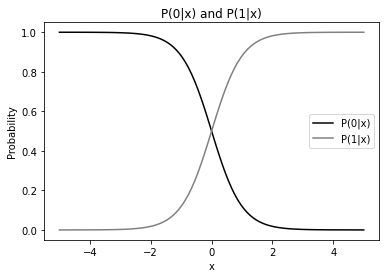

In [30]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng


#create gaussian pdf
def gaussian(x, mu, sigma, A):
        pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( (-(x-mu) ** 2)/(2 * sigma ** 2))
        return pdf

#we use the range -5 to 5 for the x-axis
x = np.linspace(-5,5,100)

#define F_0, F_1, epsilon, and marginal distribution
F_0=gaussian(x, mu= -1, sigma=1, A=1)
F_1=gaussian(x, mu= 1, sigma=1, A=1)
epsilon=0.50
marg_x=epsilon*F_0 +(1-epsilon)*F_1

#plotting
plt.title("$F_0$, $F_1$, and marginal distribution")
plt.xlabel("x")
plt.ylabel("Probability")

plt.plot(x, F_0, color="black", label="$F_0$")
plt.plot(x, F_1, color="gray", label="$F_1$")
plt.plot(x, marg_x, color="red", label="Marginal Distribution")
plt.legend()
plt.show()

plt.figure()

#calculate conditional probabilities as given in a
P_0_given_x = epsilon * F_0 / marg_x
P_1_given_x = (1-epsilon) * F_1 / marg_x
plt.title("P(0|x) and P(1|x)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.plot(x, P_0_given_x, color="black", label="P(0|x)")
plt.plot(x, P_1_given_x, color="gray", label="P(1|x)")
plt.legend()

### e. and f. 

We repeat the same steps but change $\epsilon$ and $\mu$ values.

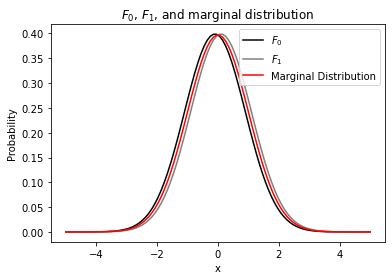

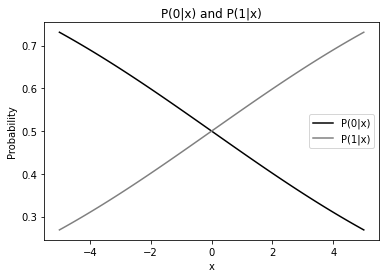

In [32]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng


#create gaussian pdf
def gaussian(x, mu, sigma, A):
        pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( (-(x-mu) ** 2)/(2 * sigma ** 2))
        return pdf

#we use the range -5 to 5 for the x-axis
x = np.linspace(-5,5,100)

#define F_0, F_1, epsilon, and marginal distribution
F_0=gaussian(x, mu= -.1, sigma=1, A=1)
F_1=gaussian(x, mu= .1, sigma=1, A=1)
epsilon=0.5
marg_x=epsilon*F_0 +(1-epsilon)*F_1

#plotting
plt.figure()
plt.title("$F_0$, $F_1$, and marginal distribution")
plt.xlabel("x")
plt.ylabel("Probability")
plt.plot(x, F_0, color="black", label="$F_0$")
plt.plot(x, F_1, color="gray", label="$F_1$")
plt.plot(x, marg_x, color="red", label="Marginal Distribution")
plt.legend()
plt.show()


#calculate conditional probabilities as given in a
plt.figure()
P_0_given_x = epsilon * F_0 / marg_x
P_1_given_x = (1-epsilon) * F_1 / marg_x
plt.title("P(0|x) and P(1|x)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.plot(x, P_0_given_x, color="black", label="P(0|x)")
plt.plot(x,P_1_given_x, color="gray", label="P(1|x)")
plt.legend()

### g. and h. 

We again repeat the same steps but change $\epsilon$ and $\mu$ values.

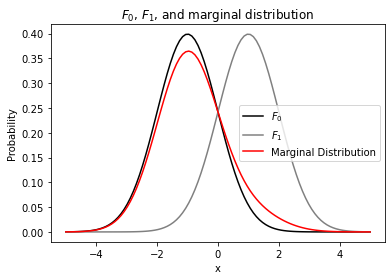

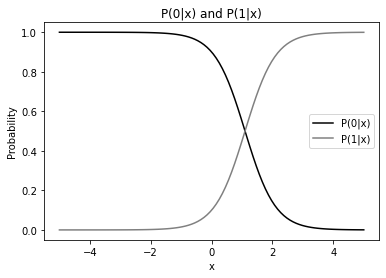

In [38]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng


#create gaussian pdf
def gaussian(x, mu, sigma, A):
        pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( (-(x-mu) ** 2)/(2 * sigma ** 2))
        return pdf

#we use the range -5 to 5 for the x-axis
x = np.linspace(-5,5,100)

#define F_0, F_1, epsilon, and marginal distribution
F_0=gaussian(x, mu= -1, sigma=1, A=1)
F_1=gaussian(x, mu= 1, sigma=1, A=1)
epsilon=0.9
marg_x=epsilon*F_0 +(1-epsilon)*F_1

#plotting
plt.figure()
plt.title("$F_0$, $F_1$, and marginal distribution")
plt.xlabel("x")
plt.ylabel("Probability")
plt.plot(x, F_0, color="black", label="$F_0$")
plt.plot(x, F_1, color="gray", label="$F_1$")
plt.plot(x, marg_x, color="red", label="Marginal Distribution")
plt.legend()
plt.show()


#calculate conditional probabilities as given in a
plt.figure()
P_0_given_x = epsilon * F_0 / marg_x
P_1_given_x = (1-epsilon) * F_1 / marg_x
plt.title("P(0|x) and P(1|x)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.plot(x, P_0_given_x, color="black", label="P(0|x)")
plt.plot(x,P_1_given_x, color="gray", label="P(1|x)")
plt.legend()

## i.

Linear, lower slopes in graph f imply significant overlap between $F_0$ and $F_1$, which we observe to be the case because of the very similar means and equivalent variances in f. 

However, steeper slopes in graphs d and h imply less overlap between $F_0$ and $F_1$ (greater vertical distance between probabilities as we can see), which we observe to be the case again because of their larger difference in mean under the same variance seen in d and h.

Graph h is in a similar scenario as graph d with the same distribution parameters, but with a higher $\epsilon$. As such, the marginal distribution is shifted towards the distribution of the subpopulation of greater magnitude, subpopulation 0 because more random draws will now come from subpopulation 0. As such, the functions in h intersect more to the right of than in graph d because the greater chance of any individual to come from subpopulation 0 (i.e. we need a greater x for the same probability of P(0|x) and P(1|x)). 

## 4. Infinite Mixture Distribution
### a. 

We see that the total probability of $l$ will be the probability of $l$ given $\mu$ multipled by $\mu$ for every $\mu$. In addition, $l$, as number of individuals, must be nonnegative. So, $\mu \geq 0$ and we have

$$P(l; \beta) \int_0^\infty P(l | \mu) P(\mu) d\mu$$

$P(l | \mu)$ is Poisson distributed with parameter $\mu$ and $P(\mu)$ is exponentially distributed with expectation $\beta^{-1} \implies$ the mean of $P(\mu)$ is $\frac{1}{\beta^{-1}} = \beta$. We write in these PDFs in our integral.

$$P(l; \beta) = \int_0^\infty \frac{\mu^l e^{-\mu}}{l!} \beta e^{-\beta \mu} d\mu$$

$$= \frac{\beta}{l!} \int_0^\infty \mu^l e^{-\mu} e^{-\beta \mu} d\mu$$

$$= \frac{\beta}{l!} \int_0^\infty \mu^l e^{-\mu(1+\beta)} d\mu$$.

Setting $v = \mu(1+\beta)$ we see  $\frac{d \mu}{dv} = \frac{1}{1+\beta} \implies d \mu = \frac{dv}{1+B}$. Subbing in, 

$$= \frac{\beta}{l!} \int_0^\infty \frac{1}{1+\beta} (\frac{v}{1+\beta})^l e^{-v} dv$$.

$$= \frac{\beta}{l! (1+\beta)^{l+1}} \int_0^\infty v^l e^{-v} dv$$.


To compute the right side integral, we consider when $l=1$. Here,

$$\int_0^\infty v e^{-v} dv$$

Let $u=v$, $du = 1 dv$, $v = -e^{-v}$, $dv = e^{-v} dv$ for a u-substitution. 
$$\int_0^\infty v e^{-v} dv$$
$$=-ve^{-v}-\int-e^{-v} dv = -(x+1)e^{-x} \Big|_0^\infty = 1$$

Now, we consider when $l=2$. 


Let $u=v^2$, $du = 2v dv$, $v = -e^{-v}$, $dv = e^{-v} dx$ for a u-substitution. 
$$\int_0^\infty v^2 e^{-v} dv$$
$$= -v^2e^{-v} \Big|_0^\infty-\int-2ve^{-v} dv $$
$$= -v^2e^{-v} \Big|_0^\infty +2\int ve^{-v} dv $$

$$= 0 +2\cdot 1= 2$$

As we increase $l$, we see the same pattern continue. When $l=3$, the integral evalues to $3\cdot2\cdot1=6$. Thus, we conclude the integral evaluates to $l!$. 

We finally have 

$$= P(l;\beta) = \frac{\beta}{l! (1+\beta)^{l+1}} l! = \boxed{\frac{\beta}{(1+\beta)^{l+1}}}$$
